In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("janmejaybhoi/cotton-disease-dataset")


print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cotton-disease-dataset


In [4]:
import os
os.listdir("/kaggle/input/cotton-disease-dataset/Cotton Disease")

['val', 'test', 'train']

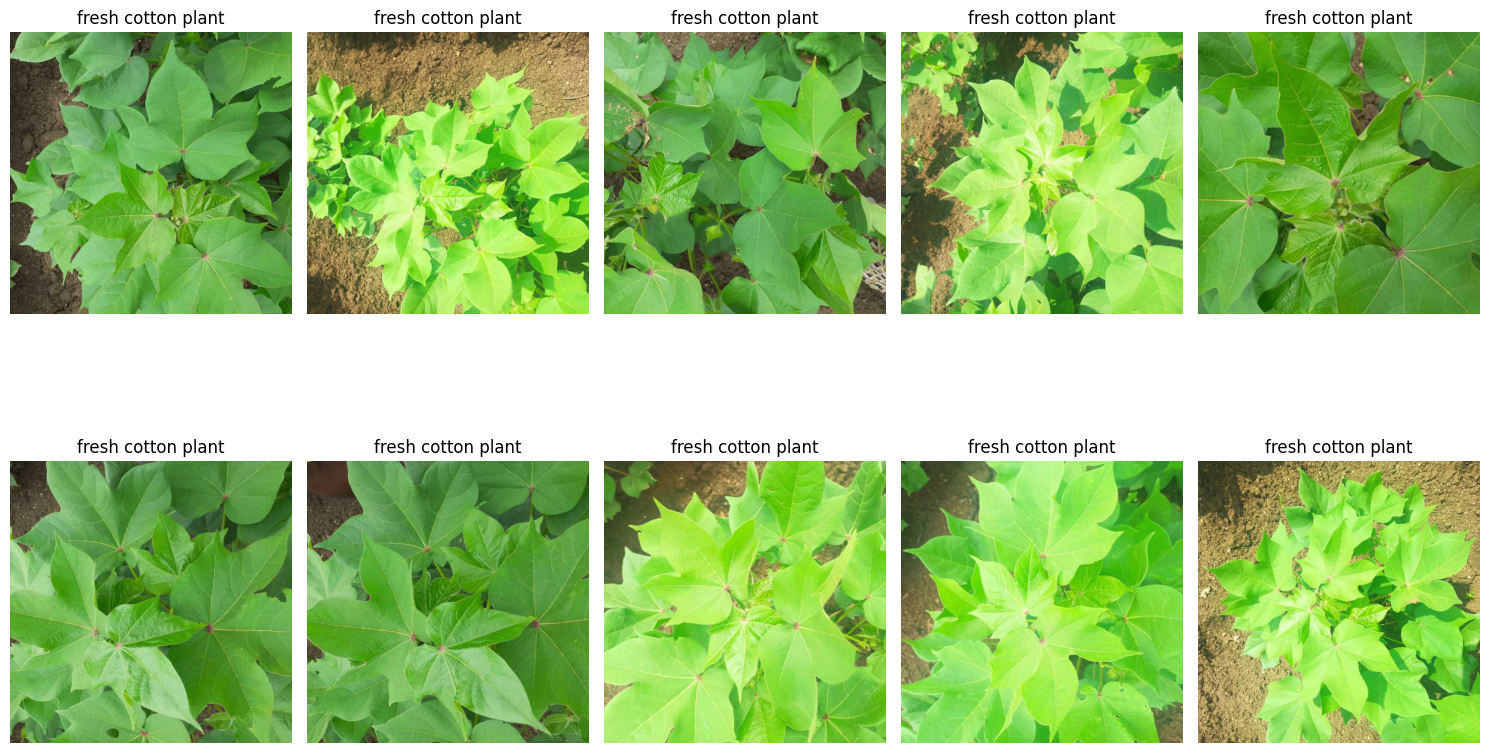

In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_path = "/kaggle/input/cotton-disease-dataset/Cotton Disease/train"

# Get list of class folders (e.g., Diseased cotton leaf, Fresh cotton leaf, etc.)
class_dirs = [os.path.join(train_path, d) for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]

# Collect all image paths from all class folders
image_paths = []
for class_dir in class_dirs:
    for fname in os.listdir(class_dir):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(class_dir, fname))

# Show the first 10 images
plt.figure(figsize=(15, 10))
for i in range(10):
    img = mpimg.imread(image_paths[i])
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(image_paths[i].split("/")[-2])  # Show class name
    plt.axis('off')

plt.tight_layout()
plt.show()


In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
img_size = 150
train_path = "/kaggle/input/cotton-disease-dataset/Cotton Disease/train"
test_path = "/kaggle/input/cotton-disease-dataset/Cotton Disease/test"
valid_path = "/kaggle/input/cotton-disease-dataset/Cotton Disease/val"

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size = (img_size,img_size),
    batch_size = 32,
    class_mode = "categorical"
)
test_data = test_datagen.flow_from_directory(
    test_path,
    target_size = (img_size,img_size),
    batch_size = 32,
    class_mode = "categorical"
)
validation_data = validation_datagen.flow_from_directory(
    valid_path,
    target_size = (img_size,img_size),
    batch_size = 32,
    class_mode = "categorical"
)



Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.
Found 253 images belonging to 4 classes.


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
model_chkpoint = ModelCheckpoint(
    filepath = "model.keras",
    mode="max",
    monitor = "val_accuracy",
    save_best_only = True,
    verbose=1
)
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(img_size,img_size,3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(4,activation="softmax"))
model.compile(
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    optimizer = "adam",
)

In [50]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │       5,308,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,328,132 (20.33 MB)

 Trainable params: 5,328,132 (20.33 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history = model.fit(
    train_data,
    batch_size = 32,
    epochs=50,
    validation_data = validation_data,
    callbacks = [model_chkpoint]
)

Epoch 1/50
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.4290 - loss: 1.3054
Epoch 1: val_accuracy improved from -inf to 0.54545, saving model to model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 314ms/step - accuracy: 0.4295 - loss: 1.3034 - val_accuracy: 0.5455 - val_loss: 1.0781
Epoch 2/50
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.5624 - loss: 1.0487
Epoch 2: val_accuracy improved from 0.54545 to 0.63241, saving model to model.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 18s 254ms/step - accuracy: 0.5627 - loss: 1.0479 - val_accuracy: 0.6324 - val_loss: 0.9142
Epoch 3/50
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.5754 - loss: 1.0013
Epoch 3: val_accuracy did not improve from 0.63241
61/61 ━━━━━━━━━━━━━━━━━━━━ 17s 244ms/step - accuracy: 0.5762 - loss: 1.0004 - val_accuracy: 0.6166 - val_loss: 0.8803
Epoch 4/50
60/61 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.6312 - loss: 0.9140
Epoch 4: val_accuracy improved from 0.63241 to 0.63636, saving model to model.keras
61

In [54]:
import os
os.listdir()
from tensorflow.keras.models import load_model
model = load_model("model.keras")

In [56]:
loss, accuracy = model.evaluate(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 424ms/step - accuracy: 0.9188 - loss: 0.1632


In [61]:
from IPython.display import FileLink
FileLink('hg.keras')  # Link to download the file

/kaggle/working/hg.keras